<div style="display: flex; background-color: RGB(255,114,0); padding: 30px;" >

# MNIST 
</div>

Dans ce projet, nous utiliserons l'ensemble de données **MNIST**, qui est un ensemble de 70 000 petites images de chiffres écrits à la main par des lycéens et des employés du Bureau américain du recensement.        
Chaque image est étiquetée avec le chiffre qu'elle représente.    
Cet ensemble a été tellement étudié qu'il est souvent appelé le "hello world" de Apprentissage automatique : chaque fois que les gens proposent une nouvelle classification algorithme, ils sont curieux de voir comment il fonctionnera sur **MNIST**, et toute personne qui apprend l'apprentissage automatique s'attaque à cet ensemble de données tôt ou tard.   
**Scikit-Learn** fournit de nombreuses fonctions d'assistance pour télécharger des ensembles de données populaires.     
Le MNIST en fait partie. https://www.kaggle.com/c/digit-recognizer     
https://fr.wikipedia.org/wiki/Base_de_donn%C3%A9es_MNIST     


Avant de commancer le projet essayez de voir les cours et faire les travaux pratiques SVM.
http://cedric.cnam.fr/vertigo/cours/ml2/      

C'est un projet de classification, alors utiliser par exemple les modèles de Machine Learning de la librairie **scikit-learn** suivant: https://scikit-learn.org/stable/supervised_learning.html    

* LogisticRegression
* KNN
* SVC :
  * https://scikit-learn.org/stable/modules/svm.html#classification
  * http://cedric.cnam.fr/vertigo/cours/ml2/tpSVMLineaires.html
  * http://cedric.cnam.fr/vertigo/cours/ml2/tpMethodesNoyaux.html#machines-a-vecteurs-de-support-svm


Essayer de définir et comprendre les mots clefs de chaque algorithme

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mnist_function import *
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import OneHotEncoder

<div style="display: flex; background-color: Blue; padding: 15px;" >

## 1.Chargement des données
</div>

In [2]:
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

- La clé **DESCR** décrivant le jeu de données

- La clé **data** contenant un tableau avec une ligne par instance et une colonne par caractéristique

- La clé **target** contenant un tableau avec les étiquettes

<div style="display: flex; background-color: Blue; padding: 15px;" >

## 2.Exploration des données
</div>

Voir le site officiel : http://yann.lecun.com/exdb/mnist/

In [3]:
type(mnist)

sklearn.utils.Bunch

In [4]:
mnist.frame

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


In [5]:
mnist.frame.columns

Index(['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7',
       'pixel8', 'pixel9', 'pixel10',
       ...
       'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780', 'pixel781',
       'pixel782', 'pixel783', 'pixel784', 'class'],
      dtype='object', length=785)

In [6]:
# Target = class
mnist.frame['class']

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [7]:
mnist.feature_names

['pixel1',
 'pixel2',
 'pixel3',
 'pixel4',
 'pixel5',
 'pixel6',
 'pixel7',
 'pixel8',
 'pixel9',
 'pixel10',
 'pixel11',
 'pixel12',
 'pixel13',
 'pixel14',
 'pixel15',
 'pixel16',
 'pixel17',
 'pixel18',
 'pixel19',
 'pixel20',
 'pixel21',
 'pixel22',
 'pixel23',
 'pixel24',
 'pixel25',
 'pixel26',
 'pixel27',
 'pixel28',
 'pixel29',
 'pixel30',
 'pixel31',
 'pixel32',
 'pixel33',
 'pixel34',
 'pixel35',
 'pixel36',
 'pixel37',
 'pixel38',
 'pixel39',
 'pixel40',
 'pixel41',
 'pixel42',
 'pixel43',
 'pixel44',
 'pixel45',
 'pixel46',
 'pixel47',
 'pixel48',
 'pixel49',
 'pixel50',
 'pixel51',
 'pixel52',
 'pixel53',
 'pixel54',
 'pixel55',
 'pixel56',
 'pixel57',
 'pixel58',
 'pixel59',
 'pixel60',
 'pixel61',
 'pixel62',
 'pixel63',
 'pixel64',
 'pixel65',
 'pixel66',
 'pixel67',
 'pixel68',
 'pixel69',
 'pixel70',
 'pixel71',
 'pixel72',
 'pixel73',
 'pixel74',
 'pixel75',
 'pixel76',
 'pixel77',
 'pixel78',
 'pixel79',
 'pixel80',
 'pixel81',
 'pixel82',
 'pixel83',
 'pixel84',
 

<div style="display: flex; background-color: Green; padding: 7px;" >

### 2.1. X et Y
</div>

In [8]:
X, y = mnist["data"], mnist["target"]

In [9]:
X.shape

(70000, 784)

In [10]:
y.shape

(70000,)

<div style="display: flex; background-color: Green; padding: 7px;" >

### 2.3. Analyse si nettoyage ou non
</div>

In [11]:
print(f"X nan:{X.isna().sum().sum()} et Y nan:{y.isna().sum().sum()}")

X nan:0 et Y nan:0


In [12]:
X.describe(include="all")

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.0,70000.0,70000.0,70000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.197414,0.099543,0.046629,0.016614,0.012957,0.001714,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.991206,4.256304,2.783732,1.561822,1.553796,0.320889,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [13]:
X_reduce = X.copy()

In [14]:
X_reduce = X_reduce.drop(columns=['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7',
       'pixel8', 'pixel9', 'pixel10', 'pixel11', 'pixel12'], axis=1)

In [15]:
X_reduce.describe(include="all")

,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.0,70000.0,70000.0,70000.0
mean,0.001800,0.006714,0.003086,0.000129,0.0,0.0,0.0,0.0,0.0,0.0,...,0.197414,0.099543,0.046629,0.016614,0.012957,0.001714,0.0,0.0,0.0,0.0
std,0.440064,1.260218,0.816403,0.034017,0.0,0.0,0.0,0.0,0.0,0.0,...,5.991206,4.256304,2.783732,1.561822,1.553796,0.320889,0.0,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,116.000000,254.000000,216.000000,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [16]:
X_reduce_max = X_reduce.copy()

In [17]:
X_reduce_max = X_reduce_max.drop(columns=['pixel13', 'pixel14', 'pixel15', 'pixel16', 'pixel17', 'pixel18',
       'pixel19', 'pixel20', 'pixel21', 'pixel22', 'pixel23', 'pixel24', 'pixel25', 'pixel26', 'pixel27', 'pixel28',
       'pixel29', 'pixel30', 'pixel31', 'pixel32', 'pixel781', 'pixel782', 'pixel783', 'pixel784'], axis=1)

In [18]:
X_reduce_max.columns

Index(['pixel33', 'pixel34', 'pixel35', 'pixel36', 'pixel37', 'pixel38',
       'pixel39', 'pixel40', 'pixel41', 'pixel42',
       ...
       'pixel771', 'pixel772', 'pixel773', 'pixel774', 'pixel775', 'pixel776',
       'pixel777', 'pixel778', 'pixel779', 'pixel780'],
      dtype='object', length=748)

In [19]:
X_reduce_max.describe(include="all")

,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,...,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,0.000229,0.001329,0.011329,0.023071,0.043229,0.062243,0.117929,0.171243,0.193414,0.190086,...,0.669500,0.589571,0.479229,0.333600,0.197414,0.099543,0.046629,0.016614,0.012957,0.001714
std,0.060474,0.230432,1.322745,2.029539,2.951033,3.242019,4.820413,5.677191,6.051967,5.897197,...,11.236708,10.501991,9.448936,7.921717,5.991206,4.256304,2.783732,1.561822,1.553796,0.320889
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,16.000000,47.000000,236.000000,254.000000,255.000000,254.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,254.000000,254.000000,253.000000,253.000000,254.000000,62.000000


In [20]:
X_reduce[X_reduce['pixel13']>0]

,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
12352,10.0,216.0,216.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12905,116.0,254.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


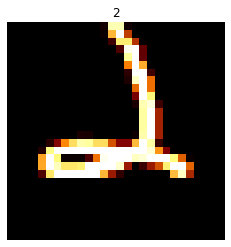

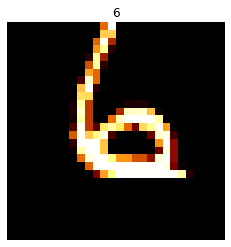

In [21]:
show_digit(X.values[12352], y[12352])
show_digit(X.values[12905], y[12905])

<div style="display: flex; background-color: indigo;" >

#### Conclusion
</div>

La suppression des pixels blancs en début et fin ne semble pas pertinente

<div style="display: flex; background-color: Green; padding: 7px;" >

### 2.4. Typage / Encodage
</div>

**Notez que target est une chaîne. La plupart des algorithmes de ML attendent des chiffres, alors allons-y convertir y en entier :**

In [22]:
y = y.astype(np.uint8)

In [23]:
y

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: uint8

In [24]:
encoder = OneHotEncoder(sparse=False)
transformed = encoder.fit_transform(pd.DataFrame(y))
transformed.shape

(70000, 10)

In [25]:
transformed

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [26]:
#Create a Pandas DataFrame of the hot encoded column
ohe_df = pd.DataFrame(transformed, columns=encoder.get_feature_names_out())
print("ohe_df:", ohe_df.shape, "y:", y.shape)

ohe_df: (70000, 10) y: (70000,)


In [27]:
#concat with original data
Y_df = pd.concat([y, ohe_df], axis=1)
print("ohe_df:", ohe_df.shape, "y:", y.shape, "data_encode:", Y_df.shape)
Y_df.head()

ohe_df: (70000, 10) y: (70000,) data_encode: (70000, 11)


,class,class_0,class_1,class_2,class_3,class_4,class_5,class_6,class_7,class_8,class_9
0,5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Mais attendez! Vous devez toujours créer une campagne de test et la mettre de côté avant d'inspecter les données de près. Le jeu de données **MNIST** est en fait déjà divisé en un ensemble d'apprentissage (les 60 000 premières images) et un ensemble de tests (les 10 000 dernières images):

In [28]:
X_train, X_test, Y_train, Y_test = X[:60000], X[60000:], Y_df[:60000], Y_df[60000:]

In [29]:
X_train.shape

(60000, 784)

In [30]:
Y_train

,class,class_0,class_1,class_2,class_3,class_4,class_5,class_6,class_7,class_8,class_9
0,5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
59996,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
59997,5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
59998,6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [31]:
Y_test

,class,class_0,class_1,class_2,class_3,class_4,class_5,class_6,class_7,class_8,class_9
60000,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
60001,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60002,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60003,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60004,4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
69995,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
69998,5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


<div style="display: flex; background-color: Green; padding: 7px;" >

### 2.5. Visualisation
</div>

<div style="display: flex; background-color: indigo;" >

#### 2.5.1. Des images / Chiffres
</div>

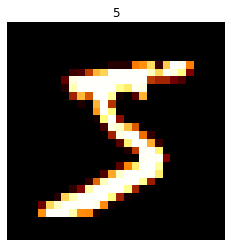

In [32]:
show_digit(X.values[0], y[0])
plt.show()

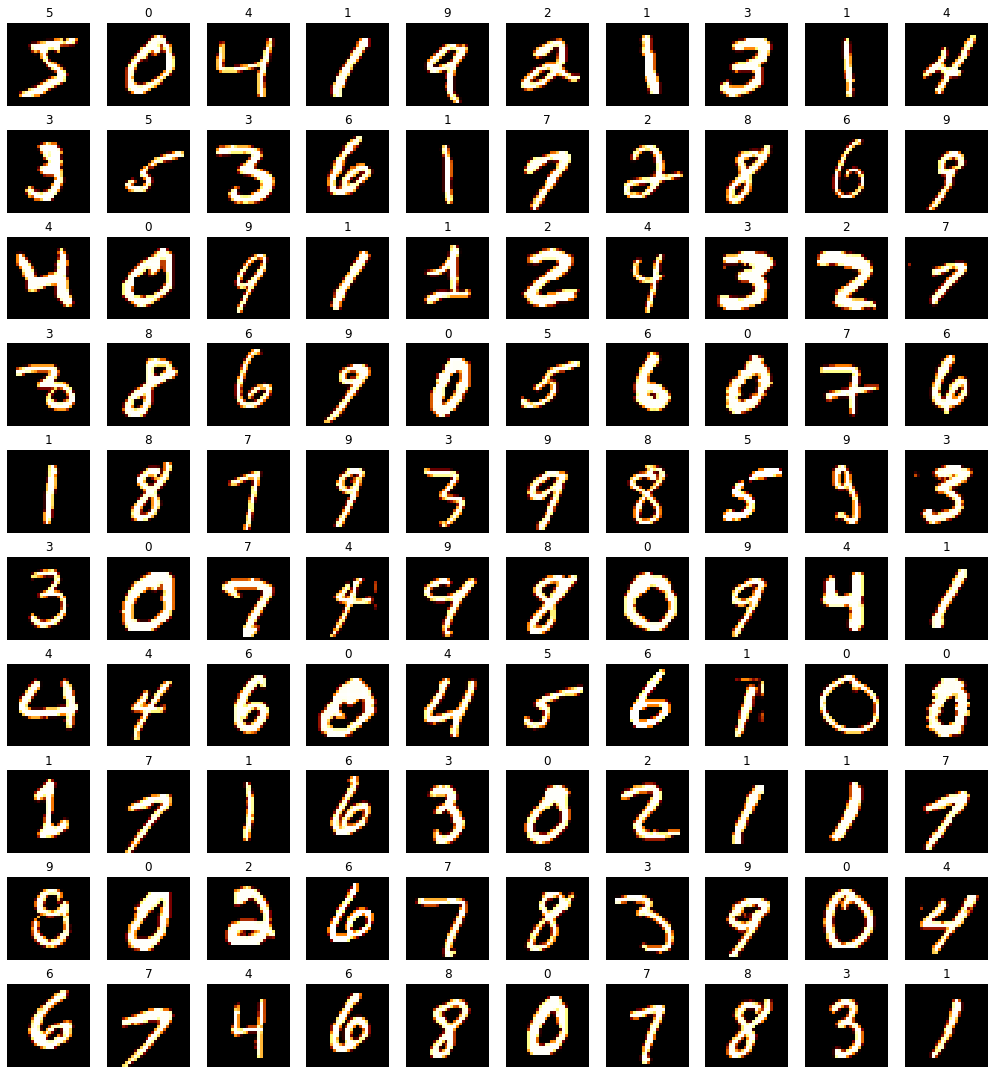

In [33]:
draw_digits(X, y, 100)

<div style="display: flex; background-color: indigo;" >

#### 2.5.2. Représentation graphique possible : via ACP ?
</div>

L'objectif est simplement d'être capable de réduire les données pour les représenter graphiquement

In [34]:
# ACP
pca = PCA(n_components=2)
acp_projection = pca.fit_transform(X_test)

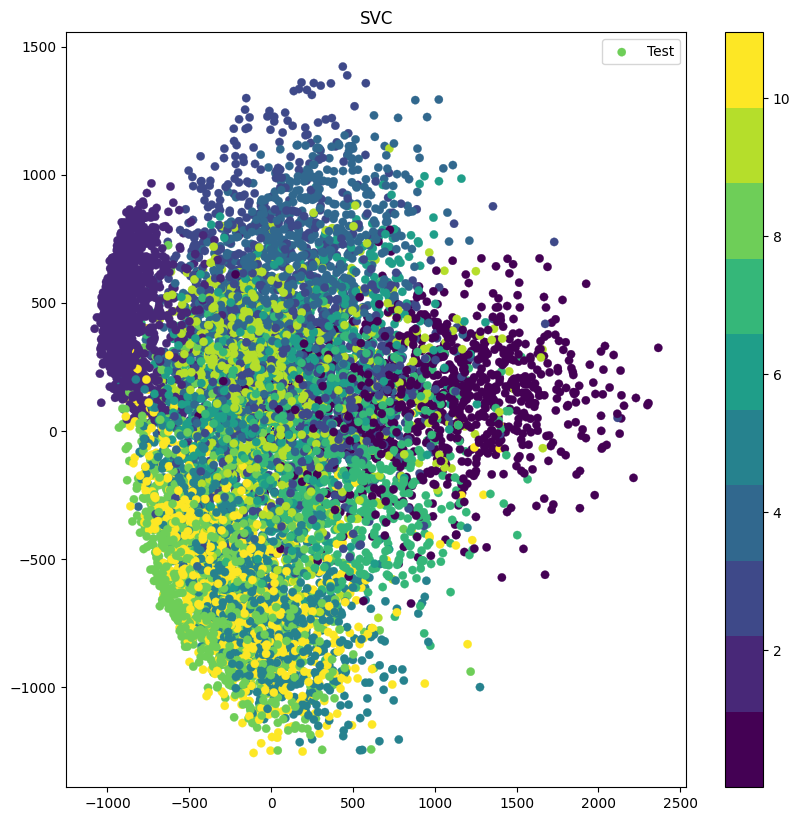

In [35]:
draw_predict(X_test, Y_test['class'], None, title="SVC", projection=acp_projection)

<div style="display: flex; background-color: indigo;" >

#### 2.5.3. Représentation graphique possible : via Isomap ?
</div>

L'objectif est simplement d'être capable de réduire les données pour les représenter graphiquement

In [36]:
from sklearn.manifold import Isomap

In [37]:
iso = Isomap(n_components=2)
projection = iso.fit_transform(X_test)

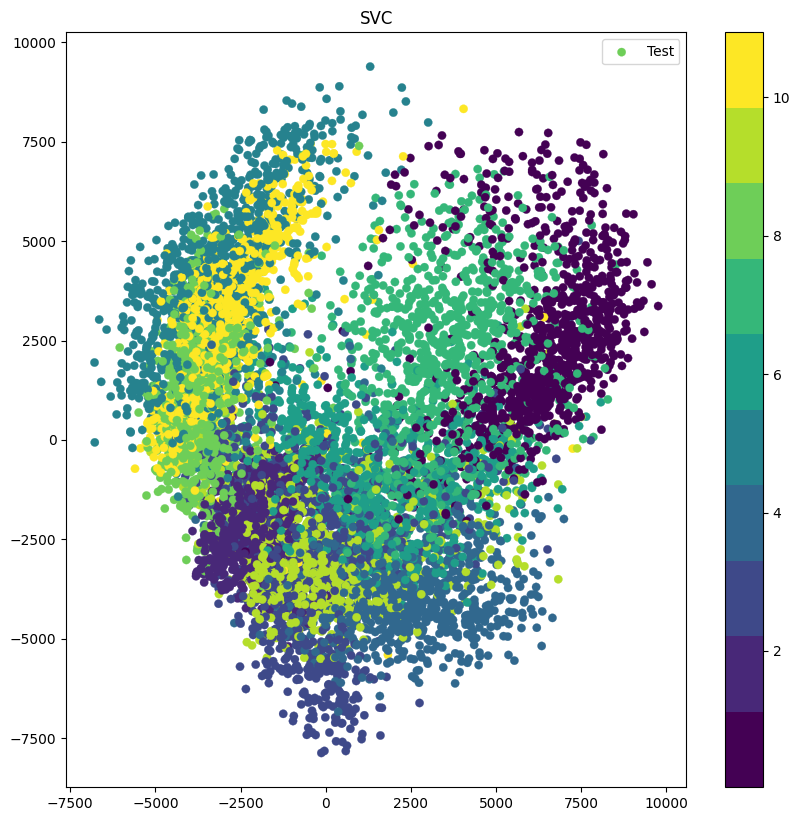

In [38]:
draw_predict(X_test, Y_test['class'], None, title="SVC", projection=projection)

<div style="display: flex; background-color: Blue; padding: 15px;" >

## Problème 1 : Classification binaire
</div>

Simplifions le problème pour l'instant et essayons seulement d'identifier un chiffre, par
exemple, le nombre 5. Ce "5-détecteur" sera un exemple d'un binaire
classificateur, capable de distinguer seulement deux classes, 5 et non-5.


* LogisticRegression
* KNN
* SVC

In [39]:
models_list = { }

In [40]:
Y_train.columns

Index(['class', 'class_0', 'class_1', 'class_2', 'class_3', 'class_4',
       'class_5', 'class_6', 'class_7', 'class_8', 'class_9'],
      dtype='object')

<div style="display: flex; background-color: Green; padding: 7px;" >

### 3.2. Test pour 1 chiffre
</div>

In [41]:
y_column_name='class_5'
random_state=0
verbose=0

In [42]:
from collections import defaultdict

def test_model_one_number(X_train, Y_train, X_test, Y_test, y_column_name=None, random_state=0, n_neighbors=3,verbose=0, scores=None):

    md_logistic, score_logistic = logistic_fonction(X_train, Y_train, X_test, Y_test, y_column_name, random_state=random_state,verbose=verbose)
    md_svc, score_svc = svc_fonction(X_train, Y_train, X_test, Y_test, y_column_name, random_state=random_state,verbose=verbose)
    md_knn, score_knn = knn_fonction(X_train, Y_train, X_test, Y_test, y_column_name, n_neighbors=n_neighbors,verbose=verbose)

    modeldic = {}
    if y_column_name is None:
        y_column_name = ""
    modeldic[y_column_name+"-Logistic"] = md_logistic
    modeldic[y_column_name+"-SVC"] = md_svc
    modeldic[y_column_name+"-KNN"] = md_knn

    if scores is None:
        scores = defaultdict(list)
    scores["Column Name"].append(y_column_name)
    scores["Logistic"].append(score_logistic)
    scores["SVC"].append(score_svc)
    scores["KNN"].append(score_knn)

    return modeldic, scores

In [43]:
# Pour éviter de déclencher la cellule ci-dessous car il est long,
# l'objectif étant toute fois de garder les traces de la dernière exécution
# just to fail

In [44]:
modeldic, scores = test_model_one_number(X_train, Y_train, X_test, Y_test, y_column_name=y_column_name, random_state=random_state, n_neighbors=3,verbose=verbose)
score_df = pd.DataFrame(scores).set_index("Column Name")
score_df.round(decimals=3)
score_df

,Logistic,SVC,KNN
Column Name,,,
class_5,0.9779,0.9956,0.9938


<div style="display: flex; background-color: Green; padding: 7px;" >

### 3.3. Test pour tous les chiffres
</div>

In [ ]:
# Pour éviter de déclencher la cellule ci-dessous car il est long,
# l'objectif étant toute fois de garder les traces de la dernière exécution
# just to fail

In [45]:
verbose=0
modeldic_full = {}

# ajout des données du modèle y_column_name
col_name_ever_done = False
if modeldic is not None:
    modeldic_full.update(modeldic)
    col_name_ever_done=True
if scores is None:
    scores = defaultdict(list)
    col_name_ever_done=True

for col in Y_train.columns:
    # pour éviter de refaire le traitement déjà réalisé sur un chiffre
    if col != 'class' and (col != y_column_name or not col_name_ever_done):
        if verbose:
            print(col)
        modeldic, scores = test_model_one_number(X_train, Y_train, X_test, Y_test, y_column_name=col, random_state=random_state, n_neighbors=3,verbose=verbose, scores=scores)
        modeldic_full.update(modeldic)
        if verbose:
            print("----------------------------")
score_df = pd.DataFrame(scores).set_index("Column Name")
score_df.round(decimals=3)
score_df

,Logistic,SVC,KNN
Column Name,,,
class_5,0.9779,0.9956,0.9938
class_0,0.9922,0.9977,0.9970
class_1,0.9933,0.9981,0.9959
class_2,0.9802,0.9947,0.9946
class_3,0.9761,0.9953,0.9937
class_4,0.9834,0.9954,0.9945
class_6,0.9849,0.9965,0.9970
class_7,0.9833,0.9929,0.9927
class_8,0.9464,0.9937,0.9930


```
|----|----------|--------|----|----------|--------|
|Nb  | Modèle   |  Score |Nb  | Modèle   | Score  |
|----|----------|--------|----|----------|--------|
|0   | logistic | 0.992  |5   | logistic | 0.978  |
|    | SVC      | 0.998  |    | SVC      | 0.996  |
|    | KNN      | 0.997  |    | KNN      | 0.994  |
|----|----------|--------|----|----------|--------|
|1   | logistic | 0.993  |6   | logistic | 0.985  |
|    | SVC      | 0.998  |    | SVC      | 0.996  |
|    | KNN      | 0.996  |    | KNN      | 0.997  |
|----|----------|--------|----|----------|--------|
|2   | logistic | 0.98   |7   | logistic | 0.983  |
|    | SVC      | 0.995  |    | SVC      | 0.993  |
|    | KNN      | 0.995  |    | KNN      | 0.993  |
|----|----------|--------|----|----------|--------|
|3   | logistic | 0.976  |8   | logistic | 0.946  |
|    | SVC      | 0.995  |    | SVC      | 0.994  |
|    | KNN      | 0.994  |    | KNN      | 0.993  |
|----|----------|--------|----|----------|--------|
|4   | logistic | 0.983  |9   | logistic | 0.963  |
|    | SVC      | 0.995  |    | SVC      | 0.991  |
|    | KNN      | 0.994  |    | KNN      | 0.992  |
|----|----------|--------|----|----------|--------|
```

La régression logistic a des scores globalement inféfieurs aux 2 autres modèles

<div style="display: flex; background-color: Blue; padding: 15px;" >

## Problème 2 : Classification Multiclass
</div>

Alors que les classificateurs binaires distinguent deux classes, les multiclasses
les classificateurs (également appelés classificateurs multinomiaux) peuvent faire la distinction entre plus de deux classes.
Certains algorithmes (tels que les classificateurs `SGD`, les classificateurs `Random Forest` et
classificateurs `Bayes naïfs`) sont capables de gérer plusieurs classes de manière native.    

Autres (tels que les classificateurs `Logistic Regression` ou `Support Vector Machine`)
sont des classificateurs strictement binaires.     
https://scikit-learn.org/stable/modules/classes.html#module-sklearn.svm     
Cependant, il existe diverses stratégies que vous peut utiliser pour effectuer une classification multiclasse avec plusieurs classificateurs binaires.    
* `OvR` : Une façon de créer un système qui peut classer les images numériques en 10 classes
(de 0 à 9) consiste à former 10 classificateurs binaires, un pour chaque chiffre (un détecteur de 0,
un 1-détecteur, un 2-détecteur, etc.). Ensuite, lorsque vous voulez classer un image, vous obtenez le score de décision de chaque classificateur pour cette image et vous sélectionnez la classe dont le classificateur génère le score le plus élevé. C'est appelé la stratégie un contre les autres (OvR) (également appelée un contre tous).
* `OvO` : Une autre stratégie consiste à former un classificateur binaire pour chaque paire de chiffres : un à distinguer les 0 et les 1, un autre pour distinguer les 0 et les 2, un autre pour les 1 et 2, et ainsi de suite. C'est ce qu'on appelle la stratégie un contre un (OvO)
  * ovo plus precis, mais trop de calcule si on a beaucoup de class dans le target   

Composition :

* `SVM` = `SVC` et `SVR` et `LinearSVC`
   * `SVC` : classification par défaut `OVO` => dataset taille modérée et Attention au nb de classes : OVO `(N(N-1))/2` ex : `(10*(9)/2)`
   * `LinearSVC` : `OVR` => : OVR `N modèles` ex : `(10 modèles)`
   * ~~~~~~~~~~~~~~~~~~~~
   * `SVR` : régression
   * `LinearSVR` : régression


Scikit-Learn détecte quand vous essayez d'utiliser un algorithme de classification binaire pour une tâche de classification multiclasse, et il exécute automatiquement OvR ou OvO, en fonction de l'algorithme.

<div style="display: flex; background-color: Green; padding: 7px;" >

### 4.1. Test pour tous les chiffres ensemble
</div>

Test sans paramétrage particulier

In [46]:
verbose=0
y_column_name='class'

In [47]:
modeldic_all, scores = test_model_one_number(X_train, Y_train, X_test, Y_test, y_column_name=y_column_name, random_state=random_state, n_neighbors=3,verbose=verbose, scores=scores)
modeldic_full.update(modeldic_all)

score_df_full = pd.DataFrame(scores).set_index("Column Name")
score_df_full.round(decimals=3)
score_df_full

,Logistic,SVC,KNN
Column Name,,,
class_5,0.9779,0.9956,0.9938
class_0,0.9922,0.9977,0.9970
class_1,0.9933,0.9981,0.9959
class_2,0.9802,0.9947,0.9946
class_3,0.9761,0.9953,0.9937
class_4,0.9834,0.9954,0.9945
class_6,0.9849,0.9965,0.9970
class_7,0.9833,0.9929,0.9927
class_8,0.9464,0.9937,0.9930


In [53]:
model_svc = modeldic_all[y_column_name+"-SVC"]
model_knn = modeldic_all[y_column_name+"-KNN"]
model_logistic = modeldic_all[y_column_name+"-Logistic"]

A ce stade les scores sont déjà très bons.

In [49]:
y_predict_svc = model_svc.predict(X_test)

<Figure size 1296x1080 with 0 Axes>

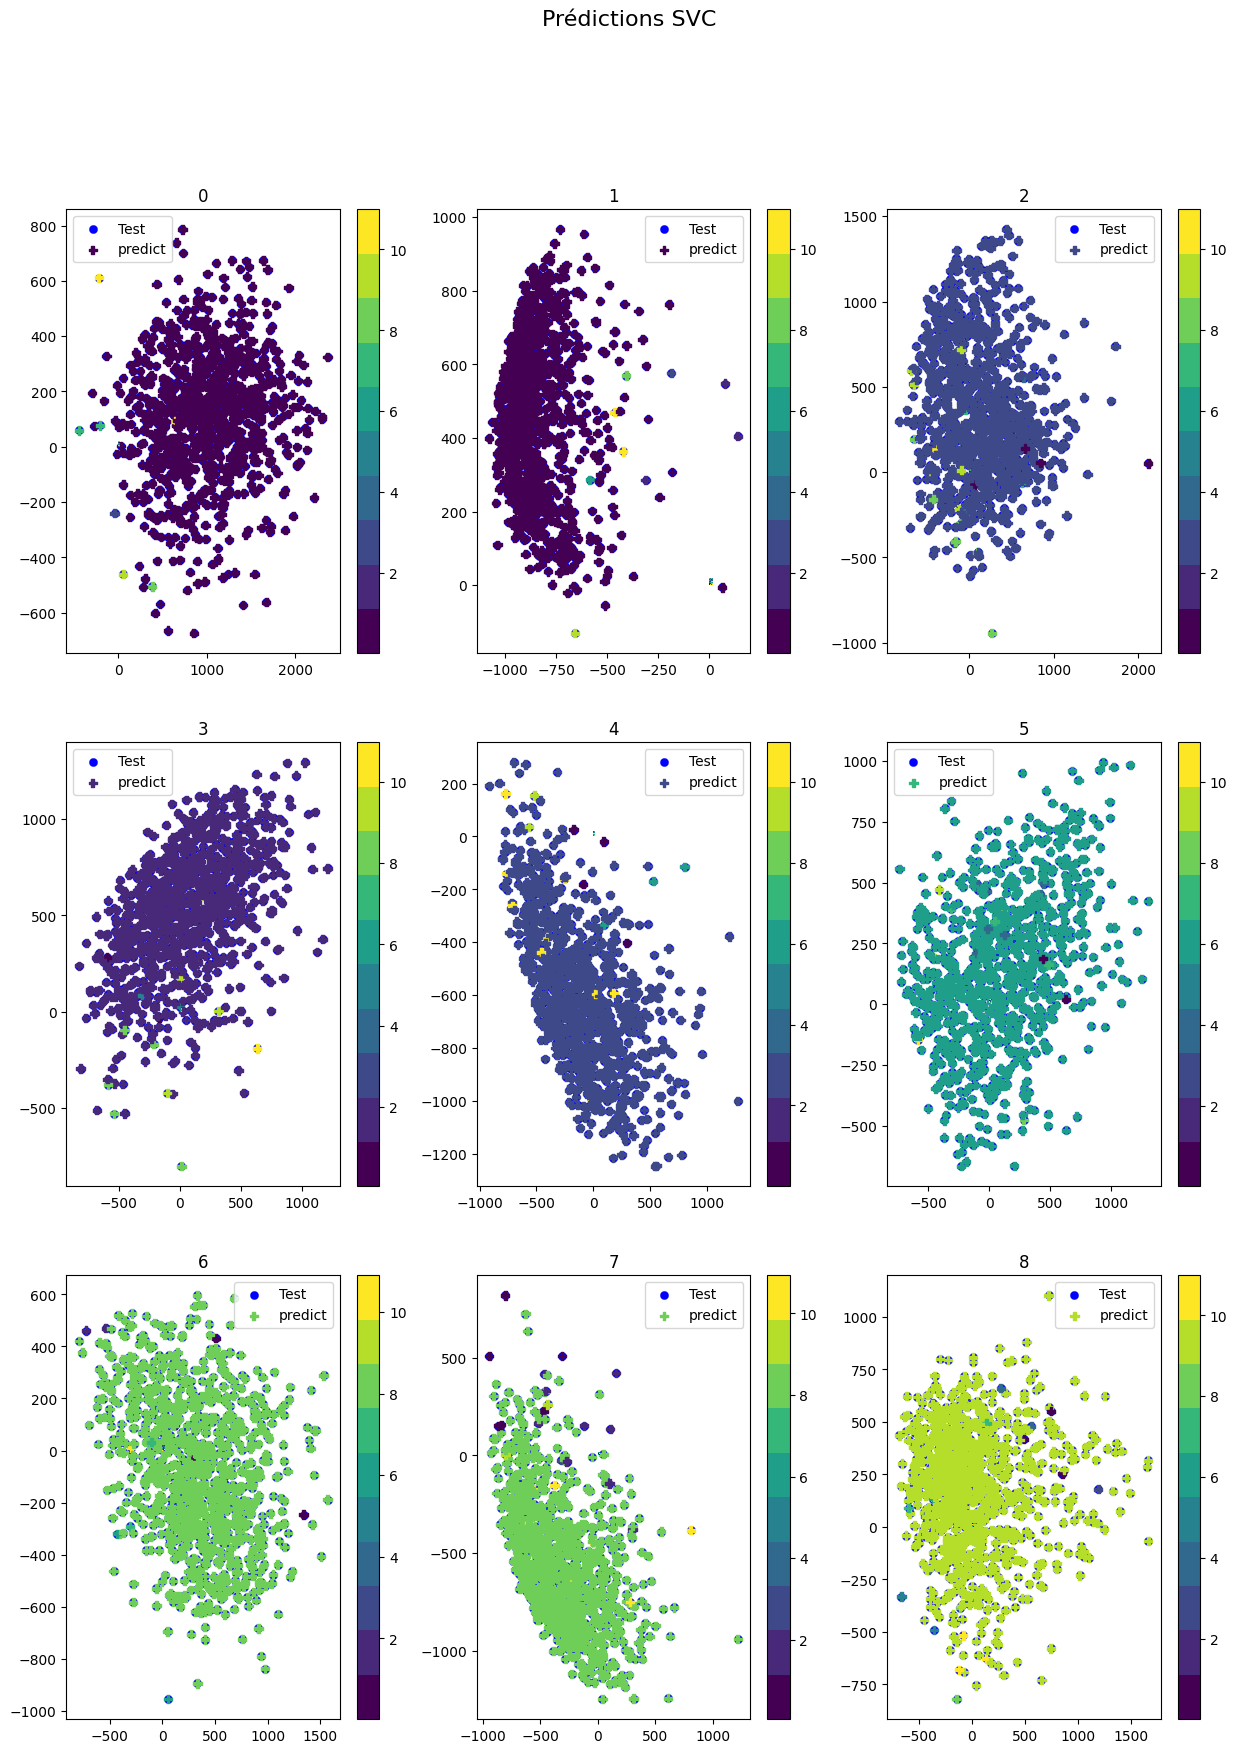

In [ ]:
draw_all_predict(X_test, Y_test[y_column_name], y_predict_svc, title="Prédictions SVC et ACP", projection=acp_projection)

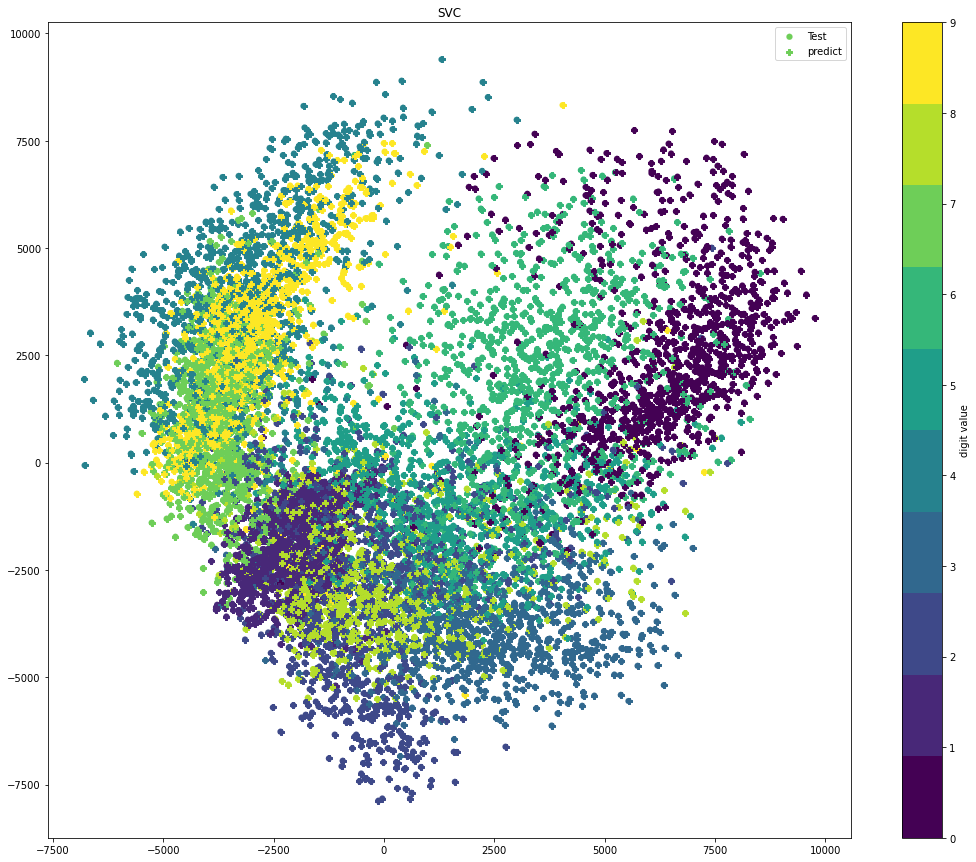

In [ ]:
draw_predict(X_test, Y_test[y_column_name], y_predict_svc, title="SVC", projection=projection)

<Figure size 1296x1080 with 0 Axes>

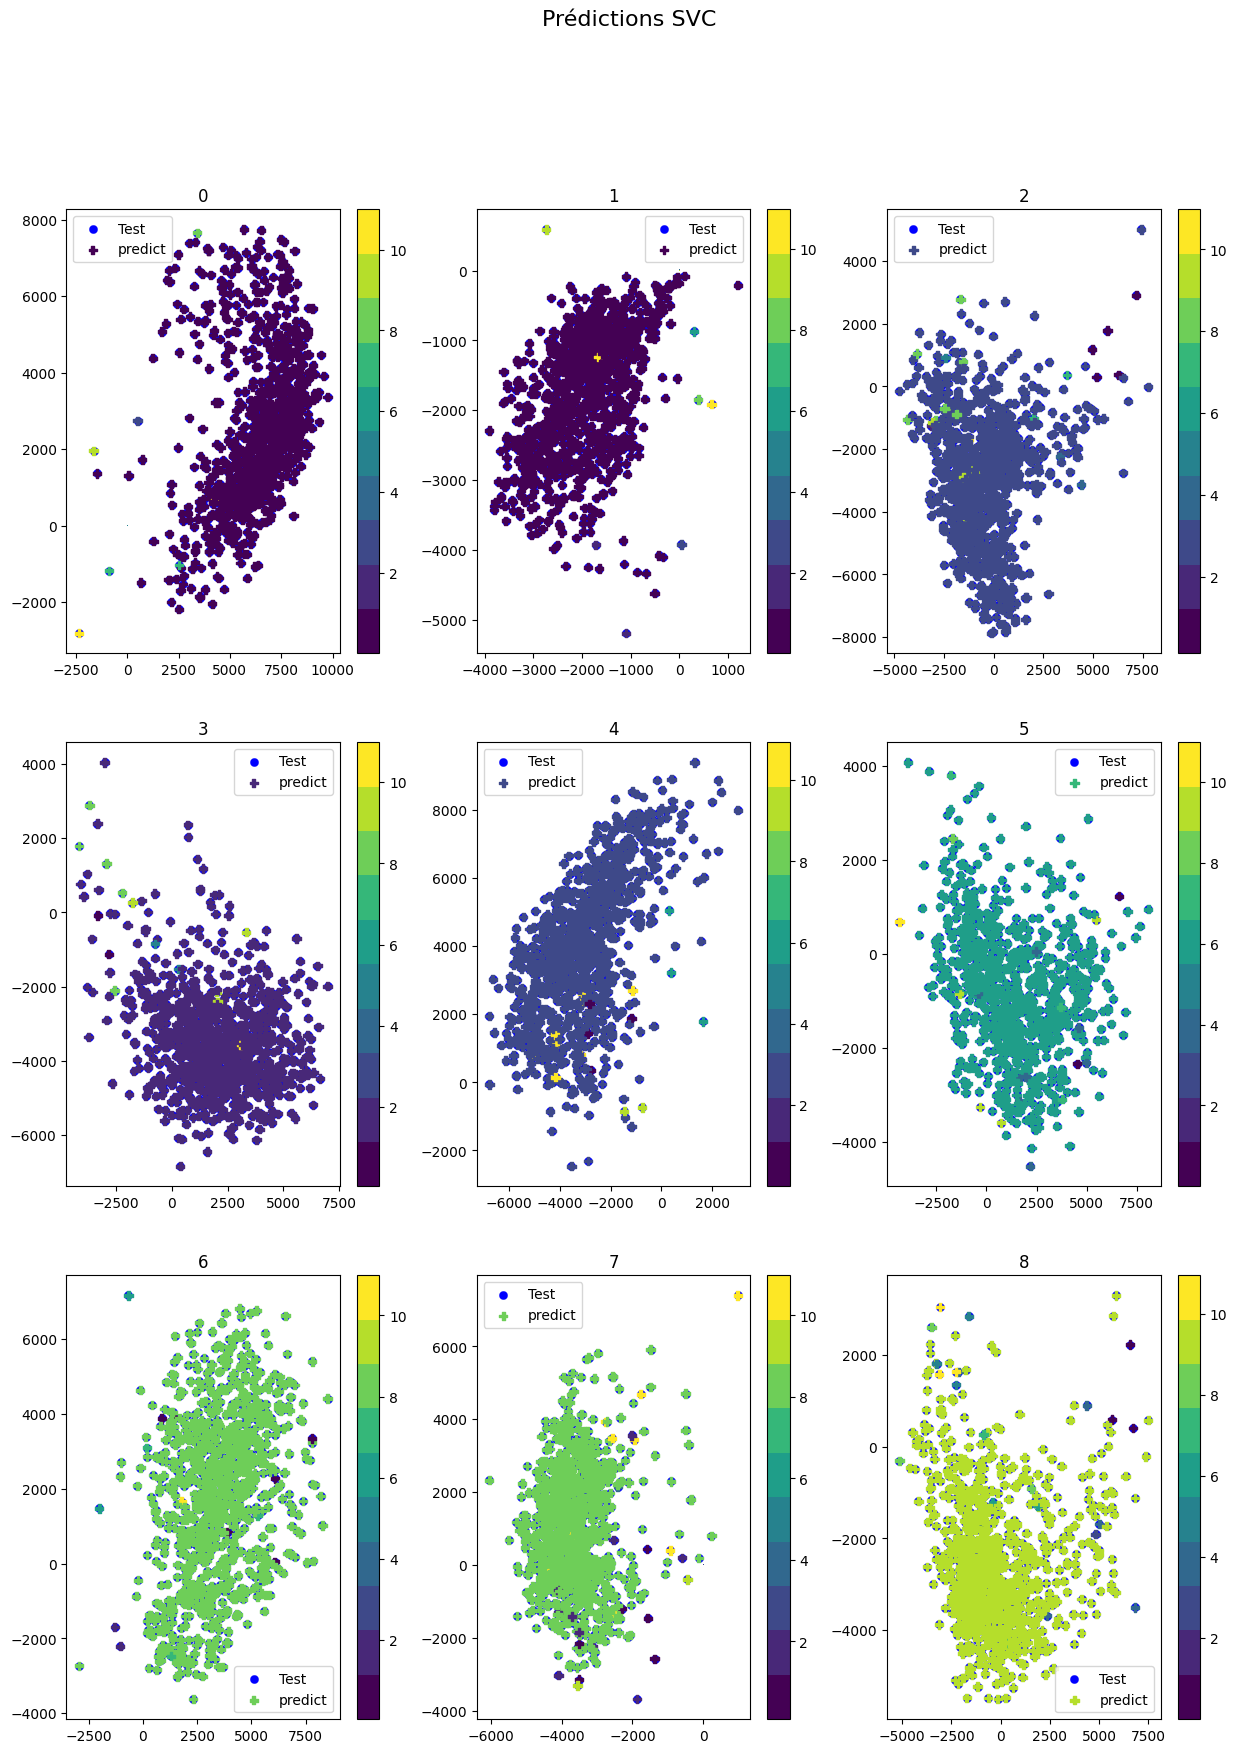

In [ ]:
draw_all_predict(X_test, Y_test['class'], y_predict_svc, title="Prédictions SVC et iso", projection=projection)

In [50]:
y_predict_knn = model_knn.predict(X_test)

<div style="display: flex; background-color: indigo;" >

#### 4.1.2. Matrice de confusion
</div

In [51]:
predictions_dic = {"SVC":(model_svc, y_predict_svc), "KNN":(model_knn,y_predict_knn)}

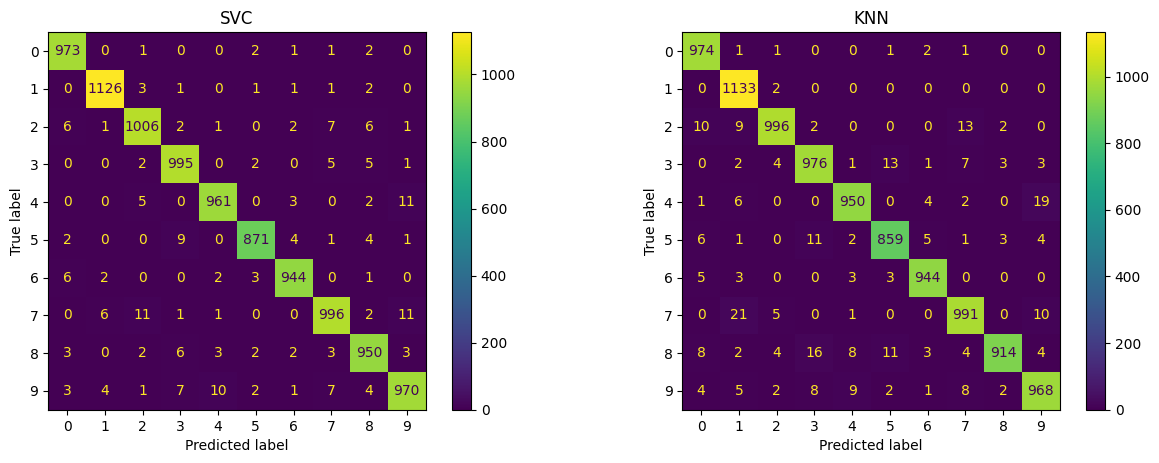

In [ ]:
draw_confusion(Y_test[y_column_name], predictions_dic)

<div style="display: flex; background-color: indigo;" >

#### 4.1.4. PrecisionRecall et RocCurveDisplay
</div>

In [52]:
y_score = model_svc.decision_function(X_test)
y_score

array([[ 3.80895496, -0.30212376,  6.19343167, ...,  9.31783975,
         2.75699419,  7.28292338],
       [ 4.18553231,  4.18761078,  9.31442588, ..., -0.31459029,
         5.28430293,  1.69121956],
       [-0.30737409,  9.30985733,  7.22657291, ...,  8.27340301,
         6.2658673 ,  2.74423466],
       ...,
       [ 0.69383538, -0.30657546,  2.71090038, ...,  6.27292798,
         7.30014128,  8.3054091 ],
       [ 5.77650505,  2.74581705,  1.7213734 , ..., -0.29335033,
         8.30520036,  0.70817749],
       [ 6.20908778, -0.30250671,  8.29122329, ...,  0.69621888,
         3.75120338,  2.72899814]])

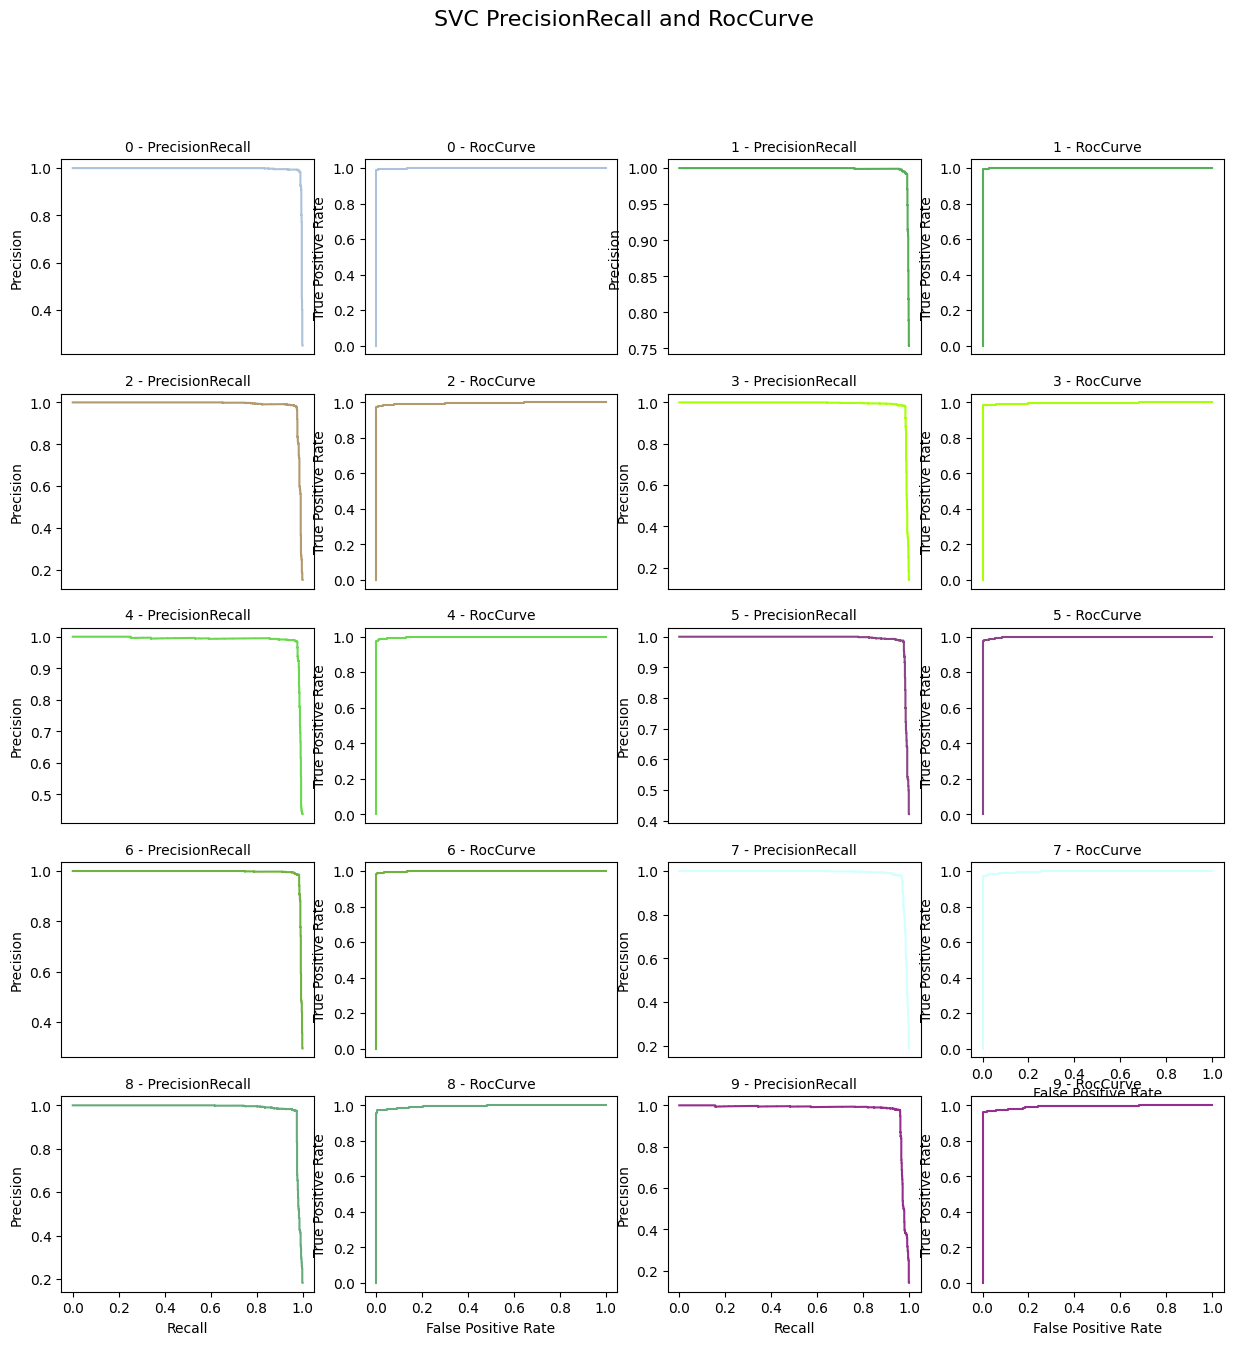

In [ ]:
draw_PrecisionRecall_and_RocCurve(model_svc, Y_test, y_score, model_name="SVC")

<div style="display: flex; background-color: indigo;" >

#### 4.1.5. Calibration
</div>

A revoir : 
* https://scikit-learn.org/stable/auto_examples/calibration/plot_calibration_curve.html#linear-support-vector-classifier

In [57]:
from sklearn.calibration import CalibratedClassifierCV, CalibrationDisplay
from matplotlib.gridspec import GridSpec

In [56]:
lr = model_logistic
svc_naive = NaivelyCalibratedLinearSVC(max_iter=10_000)
svc_isotonic = CalibratedClassifierCV(svc_naive, cv=2, method="isotonic")
svc_sigmoid = CalibratedClassifierCV(svc_naive, cv=2, method="sigmoid")

clf_list = [
    (model_logistic, "Logistic"),
    (svc_naive, "SVC naive"),
    (svc_isotonic, "SVC + Isotonic"),
    (svc_sigmoid, "SVC + Sigmoid"),
]

In [58]:
colors = plt.cm.get_cmap("Dark2")

C:\Program Files\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ValueError: Expected 'estimator' to be a binary classifier, but got LogisticRegression fit on multiclass (10 classes) data

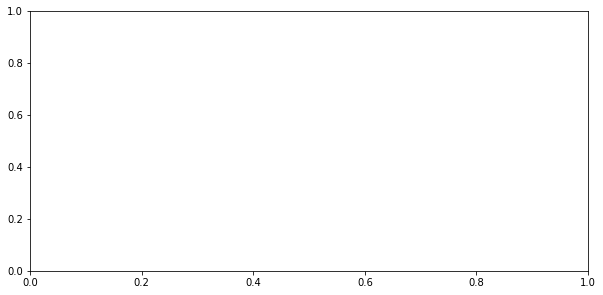

In [59]:
fig = plt.figure(figsize=(10, 10))
gs = GridSpec(4, 2)

ax_calibration_curve = fig.add_subplot(gs[:2, :2])
calibration_displays = {}
for i, (clf, name) in enumerate(clf_list):
    clf.fit(X_train, Y_train[y_column_name])
    display = CalibrationDisplay.from_estimator(
        clf,
        X_test,
        Y_test[y_column_name],
        n_bins=10,
        name=name,
        ax=ax_calibration_curve,
        color=colors(i),
    )
    calibration_displays[name] = display

ax_calibration_curve.grid()
ax_calibration_curve.set_title("Calibration plots (SVC)")

# Add histogram
grid_positions = [(2, 0), (2, 1), (3, 0), (3, 1)]
for i, (_, name) in enumerate(clf_list):
    row, col = grid_positions[i]
    ax = fig.add_subplot(gs[row, col])

    ax.hist(
        calibration_displays[name].y_prob,
        range=(0, 1),
        bins=10,
        label=name,
        color=colors(i),
    )
    ax.set(title=name, xlabel="Mean predicted probability", ylabel="Count")

plt.tight_layout()
plt.show()

<div style="display: flex; background-color: Green; padding: 7px;" >

### 4.2. Classifier Multiclass
</div>

<div style="display: flex; background-color: indigo;" >

#### 4.2.1. OneVsRestClassifier
</div>

One-vs-the-rest (OvR) multiclass strategy.

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
ovr= OneVsRestClassifier(SVC())
ovr.ft(X_train, y_train)

<div style="display: flex; background-color: indigo;" >

#### 4.2.2. OneVsOneClassifier
</div>

One-vs-one multiclass strategy.

In [ ]:
from sklearn.multiclass import OneVsOneClassifier
ovo= OneVsOneClassifier(SVC())
ovo.ft(X_train, y_train)

<div style="display: flex; background-color: indigo;" >

#### 4.2.3. OutputCodeClassifier
</div>

(Error-Correcting) Output-Code multiclass strategy.

In [ ]:
from sklearn.multiclass import OutputCodeClassifier
occ= OutputCodeClassifier(SVC())
occ.ft(X_train, y_train)

<div style="display: flex; background-color: indigo;" >

#### 4.2.4. LogisticRegression OVR
</div>

In [ ]:
model = LogisticRegression(multi_class='ovr')

<div style="display: flex; background-color: Green; padding: 7px;" >

### 4.X. Evaluation
</div

In [ ]:
# TODO, compléter la liste des modèles au fur et à mesure
model_dic = {"SVC":(model_svc,y_predict_svc,0.979), 
             "KNN":(model_knn,y_predict_knn,0.97)}

In [ ]:
df_metrics_light = get_metrics_for_model(model_dic, X_test, Y_test[y_column_name], full_metrics=False)
df_metrics_light

,R2,MAE,MSE,RMSE,Mediane AE
Model,,,,,
SVC,0.979,2.981,0.4148,0.644050,0.0
KNN,0.970,4.821,0.5792,0.761052,0.0


```
|-------|---------|-----------|--------|------------|----------|
|Modèle |R2       |MAE        |MSE     |RMSE        |Media AE  |
|-------|---------|-----------|--------|------------|----------|
|SVC    | 0.979   | 2.981     | 0.415  | 0.644      | 0        |
|KNN    | 0.97    | 4.821     | 0.579  | 0.761      | 0        |
|-------|---------|-----------|--------|------------|----------|
```

In [ ]:
score_df = get_metrics_for_model(model_dic, X_test, Y_test[y_column_name], full_metrics=True, verbose=0)
score_df

,R2,MAE,MSE,RMSE,Mediane AE,Brier loss,Log loss,F1 None,F1 micro,F1 macro,F1 weighted,Recall None,Recall micro,Recall macro,Recall weighted,Roc auc ovo,Roc auc ovr
Model,,,,,,,,,,,,,,,,,
SVC,0.979,2.981,0.4148,0.644050,0.0,NaN,NaN,"[0.9863152559553979, 0.990325417766051, 0.9752...",0.9792,0.979130,0.979186,"[0.9928571428571429, 0.9920704845814978, 0.974...",0.9792,0.979092,0.9792,NaN,NaN
KNN,0.970,4.821,0.5792,0.761052,0.0,NaN,NaN,"[0.9798792756539236, 0.9775668679896462, 0.973...",0.9705,0.970375,0.970452,"[0.9938775510204082, 0.9982378854625551, 0.965...",0.9705,0.970114,0.9705,NaN,NaN


<div style="display: flex; background-color: Green; padding: 7px;" >

### 3.2. GridSearchCV
</div>

In [ ]:
just to fail

In [ ]:
grid = classifier_logistic_grid(X_train, Y_train[y_column_name], verbose=verbose)
models_list["Logistic_5"] = grid
display_scores(models_list, X_test, Y_test, X_test_pca, y_column_name=y_column_name)

logisticregression


KeyboardInterrupt: 

In [ ]:
grid = classifier_svc(X_train, Y_train[y_column_name], verbose=verbose)
models_list["SVC_5"] = grid
display_scores(models_list, X_test, Y_test, X_test_pca, y_column_name=y_column_name)

In [ ]:
# TROP LONG
# grid = classifier_knn_grid(X_train, y_train_5, verbose=verbose)
# models_list["KNN_5"] = grid
# display_scores(models_list, X_test, Y_test, X_test_pca, y_column_name=y_column_name)

kneighborsclassifier

In [ ]:
# RISQUE TROP LONG
# grid = classifier_knn_grid(X_train_pca, y_train_5, verbose=verbose)
# models_list["KNN_pca_5"] = grid
# display_scores(models_list, X_test, Y_test, X_test_pca, y_column_name=y_column_name)

kneighborsclassifier

In [ ]:
grid = classifier_logistic_grid(X_train, Y_train[y_column_name], verbose=verbose)
models_list["Logistic_pca_5"] = grid
display_scores(models_list, X_test, Y_test, X_test_pca, y_column_name=y_column_name)

In [ ]:
grid = classifier_svc(X_train_pca, Y_train[y_column_name], verbose=verbose)
models_list["SVC_pca_5"] = grid
display_scores(models_list, X_test, Y_test, X_test_pca, y_column_name=y_column_name)

In [ ]:
grid = classifier_svc_pca(X_train, Y_train[y_column_name], verbose=verbose)
models_list["SVC_opti_p_c_a_5"] = grid
display_scores(models_list, X_test, Y_test, X_test_pca, y_column_name=y_column_name)

In [ ]:
just to fail

In [ ]:
draw_and_get_svm_svc(X_train_pca, y_train_5,X_test_pca, y_test_5,kernel='rbf', C = 1.0, gamma="auto", title="5-Décteteur") #, xlabel=None, ylabel=None, title=None)

In [ ]:
draw_and_get_svm_svc(X_train_pca, y_train_5,X_test_pca, y_test_5,kernel='linear', C = 1.0, gamma="auto", title="5-Décteteur") #, xlabel=None, ylabel=None, title=None)

In [ ]:
clf = GridSearchCV(svm.SVC(), param_grid, cv=3, n_jobs=4, verbose=1)
clf.fit(X_train_pca, y_train_5)
print("5-Décteteur: score", clf.score(X_test_pca, y_test_5))
print(clf.best_params_)

In [ ]:
draw_and_get_svm_svc(X_train_pca, y_train_5,X_test_pca, y_test_5,title="5-Décteteur", svc=clf) #, xlabel=None, ylabel=None, title=None)

In [ ]:
draw_and_get_svm_svc(X_train_pca, y_train,X_test_pca, y_test,kernel='rbf', C = 1.0, gamma="scale") #, xlabel=None, ylabel=None, title=None)

TypeError: '(slice(None, None, None), 0)' is an invalid key

In [ ]:
draw_and_get_svm_svc(X_train_pca, y_train,X_test_pca, y_test,kernel='rbf', C = 1.0, gamma="scale") #, xlabel=None, ylabel=None, title=None)

TypeError: '(slice(None, None, None), 0)' is an invalid key